# Winter 2025 Week 8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import all the functions from the Utility_functions.py file
from Utility_functions import *

## The Markowitz Model for finding the minimum-variance set
Consider a portfolio in $n$ assets with expected return $\overline{r_i}$ and covariance $\sigma_{ij}$. We would like to find the weights $w_i$ for each asset to 
$$\text{minimize } \frac{1}{2}\sum_{i,j = 1}^n w_iw_j \sigma_{ij}$$
$$ \begin{align*} \text{subject to } & \sum_1^n w_i\overline{r_i} = \overline{r} \\ &\sum_1^n w_i = 1\end{align*}$$

By the Lagrange Multipler methods, we need to solve the equations 
$$\begin{align*}\sum_{j = 1}^n \sigma_{ij}w_j-\lambda\overline{r_i}-\mu &= 0 \;\;\;\;\text{for all } i\\ \sum_1^n w_i\overline{r_i} &= \overline{r} \\ \sum_1^n w_i &= 1\end{align*}$$

## Recall: Lagrange Multiplier Methods
Let $f: \mathbb{R}^n\mapsto R$ be a continuously differentiable function that we want to optimize. Let $g_1,\ldots, g_k:\mathbb{R}^n\mapsto R$ be continuously differentiable functions such that the matrix $(\frac{\partial g_i}{\partial x_j})_{ij}$ is full rank (This condition really means that there is no redundant constraints). Then, the extrema of $f(x_1,\ldots, x_n)$ subject to $g_i(x_1,\ldots, x_n) = c_i$ for all $i$ can be found on the point satisfying the following equations 
$$\begin{align} \nabla f &= \sum_1^n \lambda_i \nabla g_i \\
 g_i(x_1,\ldots, x_n) &= c_i \;\;\;\;\;\;\;\;\;\;\text{ for all } i\end{align}$$

## Two Fund Theorem
The above equations are system of $n+2$ equations in $n+3$ variables ($w_i, \lambda, \mu, \overline{r}$). Hence, the solution set is $1$-dimensional, which is a line. If two distinct portfolio with weights vector $\mathbf{w}_1, \mathbf{w}_2$ solves the above equations, then so are $\alpha \mathbf{w}_1+(1-\alpha)\mathbf{w}_2$ for any choices of $\alpha\in\mathbb{R}$, and they are all solution to the above equations. 

In summary, all portfolios on the min-variance set are of the form $\alpha \mathbf{w}_1+(1-\alpha)\mathbf{w}_2$, where $\mathbf{w}_1, \mathbf{w}_2$ are two distinct portfolios on the min-variance set. We usually find $\mathbf{w}_1, \mathbf{w}_2$ via setting $\lambda=0,\mu=1$ or $\lambda=1,\mu = 0$. Note that by setting $\lambda = 0$, we are ignoring the first constraint. Thus, the portfolio we found by setting $\lambda = 0, \mu = 1$ is the portfolio at the minimal variance point. 


## Inclusion of risk-free asset and one fund theorem.
Suppose that we include a risk-free asset with rate of return $r_f$ and variance $0$. Then the minimum variance point would be $(0,r_f)$. The one fund theorem is saying that any efficient portfolio is a combination of this risk-free asset with a single risky asset. This efficient risky asset is computed by solving 
$$\sum_1^n\sigma_{ki}v_i = \overline{r_k}-r_f\;\;\;\;\;k = 1,2,3,\ldots, n$$ 
and normalize the $v_i$ to get the weights $w_i$. 

To visulize the solution, we find the tangent line connecting the risk free asset and the original feasible set of risky asset. In particular, we want to maximize:
$$ tan\theta = \frac{\bar{r_p}-r_f}{\sigma_p} $$
This is the Sharpe Ratio.

## Exercise 6.4
(Two stocks) Two stocks are available. The corresponding expected rates of return are $\overline{r_1}$ and $\overline{r_2}$; the corresponding variances and covariances are $\sigma_1^2$, $\sigma_2^2$, and $\sigma_{12}$. What percentages of total investment should be invested in each of the two stocks to minimize the total variance of the rate of return of the resulting portfolio? What is the mean rate of return of this portfolio?

### Solution:
We can take a look at the efficient frontier of two stocks.

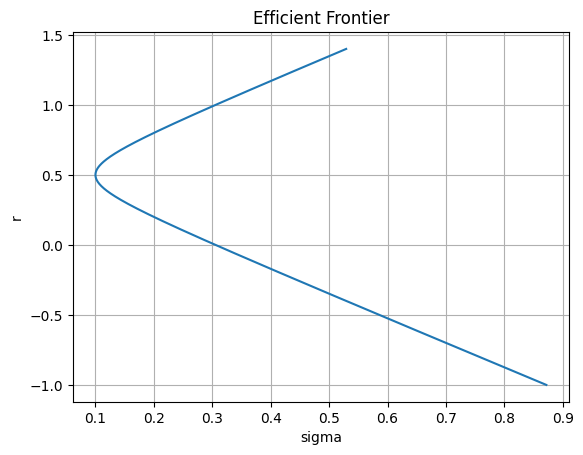

In [2]:
sigma1 = 0.1
sigma2 = 0.2
r1 = 0.5
r2 = 0.2
rho = 0.5
sigma12 = rho * sigma1 * sigma2

def r(alpha):
    return alpha * r1 + (1 - alpha) * r2

def sigma(alpha):
    return np.sqrt(alpha**2 * sigma1**2 + (1-alpha)**2 * sigma2**2 + 2 * alpha * (1-alpha) * sigma12)

alpha = np.linspace(-4, 4, 1000)

rlist = r(alpha)
sigmalist = sigma(alpha)

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


Mathematically, this can be solved using the following:
Suppose the weight for stock $1$ is $\alpha$, and the weights for stock $2$ is $1-\alpha$. We want to minimize the function 
$$\alpha^2\sigma_1^2+(1-\alpha)^2\sigma_2^2+2\alpha(1-\alpha)\sigma_{12}$$
This is a concave up quadratic function in $\alpha$. It is minimized when the derivative is zero. The derivative of the above function is 
$$2\alpha\sigma_1^2-2(1-\alpha)\sigma_2^2+(2-4\alpha)\sigma_{12}$$
The above function equals $0$ when $\alpha = \frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$, and the corresponding $1-\alpha$ is $1- \alpha = \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$. 

Therefore, to minimize the variance of the rate of return of this portfolio, the weights for stock $1$ and stock $2$ are $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ and $\frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ respectively. The expected rate of return of this portfolio is $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_1} + \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_2}$

## Exercise 6.5
(Rain insurance) Gavin Jones’s friend is planning to invest 1 million in a rock concert to be held 1 year from now. The friend figures that he will obtain 3 million revenue from his 1 million investment—unless, my goodness, it rains. If it rains, he will lose his entire investment. There is a 50% chance that it will rain the day of the concert. Gavin suggests that he buy rain insurance. He can buy one unit of insurance for 0.50, and this unit pays 1 if it rains and nothing if it does not. He may purchase as many units as he wishes, up to 3 million.

- (a) What is the expected rate of return on his investment if he buys u units of insurance? (The cost of insurance is in addition to his 1 million investment.) 
- (b) What number of units will minimize the variance of his return? What is this minimum value? And what is the corresponding expected rate of return? 

### Solution:
- (a):The total return $R$ is a random variable with $1/2$ chance to be $\frac{3\cdot 10^6}{10^6 + 0.5u}$ (when it does not rain), and $1/2$ chance to be $\frac{u}{10^6+0.5u}$. Its expected value is 
$$E[R] = \frac{1}{2}\frac{3\cdot 10^6}{10^6 + 0.5u}+\frac{1}{2}\frac{u}{10^6+0.5u} = \frac{1}{2}\frac{3\cdot 10^6 + u}{10^6+0.5u}$$
Since $r = R-1$, the expected value of rate of return is 
$$E[r] = E[R-1] = E[R]-1 = \frac{1}{2}\frac{3\cdot 10^6 + u}{10^6+0.5u} - 1$$

- (b):We see that when $u = 3\cdot 10^6$, then $R$ is deterministic with value $\frac{3\cdot 10^6}{10^6 + 0.5u}$. Thus, we have $\text{Var}(R) = 0$, and $\text{Var}(r) = \text{Var}(R-1) = \text{Var}(R) = 0$ when $u = 3\cdot 10^6$. The corresponding expected rate of return is $\frac{1}{2}\frac{6\cdot 10^6}{10^6+1.5\cdot 10^6}-1 = 0.2$. 

## Exercise 6.6
(Wildcats) Suppose there are n assets which are uncorrelated. (They might be n different “wild cat” oil well prospects.) You may invest in any one, or in any combination of them. The mean rate of return $\overline{r}$ is the same for each asset, but the variances are different. The return on asset $i$ has a variance of $\sigma_i^2$ for $i = 1,2,\ldots, n$
- (a) Show the situation on an $\overline{r}-\sigma$ diagram. Describe the efficient set.
- (b) Find the minimum-variance point. Express your result in terms of 
$$\overline{\sigma}^2 = \left(\sum_1^n \frac{1}{\sigma_i^2}\right)^{-1}$$

### Solution:
- (a):
Suppose that $\overline{r}'$ is the mean rate of return of all assets, and $\overline{r}$ is the mean rate of return of the portfolio with weights $w_i$ on each asset. Then, we have
$$\overline{r} = \sum_1^n w_i\overline{r}' = \overline{r}'$$
Thus, the $\overline{r}-\sigma$ diagram is a horizontal line at $\overline{r} = \overline{r}'$

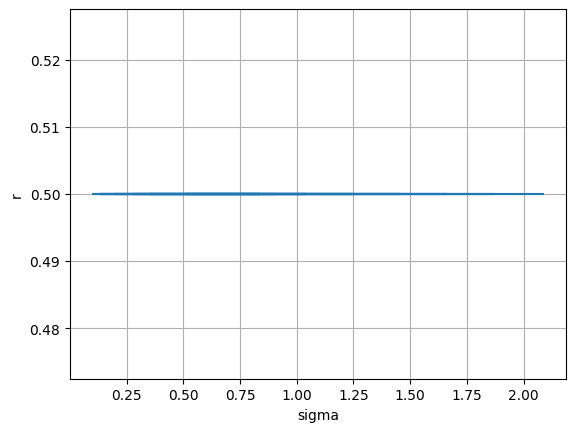

In [3]:
sigma1 = 0.1
sigma2 = 0.2
sigma3 = 0.4
r1 = 0.5
r2 = 0.5
r3 = 0.5
rho12 = 0.5
rho13 = -0.2
rho23 = 0.1
sigma12 = rho12 * sigma1 * sigma2
sigma13 = rho13 * sigma1 * sigma3
sigma23 = rho23 * sigma2 * sigma3

def r(alpha1, alpha2):
    return alpha1 * r1 + alpha2 * r2 + (1 - alpha1 - alpha2) * r3

def sigma(alpha1, alpha2):
    return np.sqrt(alpha1**2 * sigma1**2 + alpha2**2 * sigma2**2 + (1-alpha1 - alpha2)**2 * sigma3**2 + 2 * alpha1 * alpha2 * sigma12 + 2 * alpha1 * (1-alpha1-alpha2) * sigma13 + alpha2 * (1-alpha1 - alpha2) * sigma23)

alpha1, alpha2 = np.mgrid[-2:2:0.5, -2:2:0.5]

rlist = r(alpha1, alpha2).flatten()
sigmalist = sigma(alpha1, alpha2).flatten()

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.grid(True)
plt.show()

- (b): We would like to minimize $\frac{1}{2}\sum_1^n w_i^2\sigma_i^2$ (Minimizing the variance is the same minimizing $1/2$ of the variance. We multiplied it by $1/2$ so that the numbers looks nicer) subject to the constraint $\sum_1^n w_i = 1$. Hence, we need to solve use the Lagrangian Multiplier
$$\begin{align}w_i\sigma_i^2 &= \lambda \;\;\text{for all i} \\
\sum_1^n w_i &= 1\end{align}$$
The first equations implies that $w_i = \frac{\lambda}{\sigma_i^2}$, and substituting this to the second equation gives $\lambda(\sum_1^n\frac{1}{\sigma_i^2}) = 1$. Hence, we have $\lambda = \frac{1}{\sum_1^n\frac{1}{\sigma_i^2}} = \overline{\sigma}^2$. Now, we solve that $w_i = \frac{\lambda}{\sigma_i^2} = \frac{\overline{\sigma}^2}{\sigma_i^2}$. In this case, the expected rate of return is $\overline{r}'$, and variance is $\sum_1^n w_i^2\sigma_i^2 = (\overline{\sigma}^2)^2\sum_1^n \frac{1}{\sigma_i^2} = \overline{\sigma}^2$. The min variance point is $(\overline{\sigma}^2, \overline{r}')$. 

## Exercise 6.7
(Markowitz fun) There are just three assets with rates of return $r_1$ , $r_2$, and $r_3$, respectively. The covariance matrix and the expected rates of return are
$$V = \begin{bmatrix}2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2\end{bmatrix},\;\;\;\;\overline{r} = \begin{bmatrix}0.4 \\ 0.8 \\ 0.8\end{bmatrix}$$

- (a) Find the minimum-variance portfolio. [Hint: By symmetry w1 = w3.] 
- (b) Find another efficient portfolio by setting $\lambda = 1, \mu = 0$. 
- (c) If the risk-free rate is $r_f = 0.2$, find the efficient portfolio of risky assets.

### Solution:
- (a): Note we need to solve the minimal variance portfolio. If we write in the marix form:
$$V\begin{bmatrix}v_1 \\ v_2 \\ v_3\end{bmatrix} = \mu \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix},$$
Of course, $\mu \neq 0$. Thus, this is equivalent to:
$$V\begin{bmatrix}v_1 \\ v_2 \\ v_3\end{bmatrix} = \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix},$$
Thus, we can solve using the symmetry $v_1 = v_2$:\
$v_1 = 1/2, v_2 = 0, v_3 = 1/2$. After normalizing the weights, we get $w_1 = 1/2, w_2 = 0, w_3 = 1/2$, which are the weights for each asset of the minimum-variance portfolio. 

- (b):
Similarly, we have $\lambda \neq 0$. Thus we solve the following system of linear equations 
$$V\begin{bmatrix}v_1 \\ v_2 \\ v_3 \end{bmatrix} = \begin{bmatrix}0.4 \\ 0.8 \\ 0.8\end{bmatrix},$$
and we get $v_1 = 0.1, v_2 = 0.2, v_3 = 0.3$. After normalizing the weights, we get $w_1 = 1/6, w_2 = 1/3, w_3 = 1/2$, which are the weights for each asset of another efficient portfolio. 

- (c):
We solve the following system of linear equations 
$$V\begin{bmatrix}v_1 \\ v_2 \\ v_3\end{bmatrix} = \begin{bmatrix}0.4 \\ 0.8 \\ 0.8\end{bmatrix} - \begin{bmatrix}0.2 \\ 0.2 \\ 0.2\end{bmatrix},$$
and we get $v_1 = 0, v_2 = 0.2, v_3 = 0.2$. After normalizing the weights, we get $w_1 = 0, w_2 = 1/2, w_3 = 1/2$, which are the weights for each asset of the efficient risky portfolio. 

## Exercise 6.8
(Tracking) Suppose that it is impractical to use all the assets that are incorporated into a specified portfolio (such as a given efficient portfolio). One alternative is to find the portfolio, made up of a given set of n stocks, that tracks the specified portfolio most closely, in the sense of minimizing the variance of the difference in returns.

Specifically, suppose that the target portfolio has (random) rate of return $r_M$. Suppose that there are n assets with (random) rates of return $r_1,\ldots, r_n$. We wish to find the portfolio rate of return
$$r = a_1r_1+\cdots+a_nr_n$$
(with $\sum a_i = 1$) minimizing $\text{var}(r-r_M)$

- (a) Find a set of equations for the $a_i$'s. 
- (b) Although this portfolio tracks the desired portfolio most closely in terms of variance, it may sacrifice the mean. Hence, a logical approach is to minimize the variance of the tracking error subject to achieving a given mean return. As the mean is varied, this results in a family of portfolios that are efficient in a new sense—say, tracking efficient. Find the equation for the $a_i$'s that are tracking efficient.

### Solution:
- (a) We need to minimize 
$$\begin{align}\text{Var}(r-r_M) & = \text{Cov}\left(\sum_1^n a_ir_i - r_M, \sum_1^n a_ir_i-r_M\right) \\
&= \sum_{i,j = 1}^n \text{Cov}(a_ir_i, a_jr_j) - 2\sum_1^n\text{Cov}(a_ir_i, r_M), + \text{Cov}(r_M, r_M) \\
&= \sum_{i,j = 1}^n a_ia_j\sigma_{ij} - 2\sum_1^n a_i\sigma_{iM}+\sigma_M^2\end{align}$$
subject to the constraint
$$\sum_1^n a_i = 1$$

The partial derivative of the target function respect to $a_i$ is $2\sum_{j=1}^n a_j\sigma_{ij} - 2 \sigma_{iM}$, and the gradient of the constraint function is $(1,1,\ldots, 1)$. By the Lagrange Multiplier methods, we need to solve
$$\begin{align}2\sum_{j=1}^n a_j\sigma_{ij} - 2 \sigma_{iM} &= \lambda \;\;\;\;\text{ for all }i \\
\sum_1^n a_i &= 1\end{align}$$

- (b) Assume that we would like to achieve a mean return $\overline{r}$. Then, we add an additional constraint
$$\sum_1^n a_ir_i = \overline{r}$$
whose gradient is $(r_1,r_2,\ldots, r_n)$. By the Lagrange Multiplier methods, we need to solve 
$$\begin{align}2\sum_{j=1}^n a_j\sigma_{ij} - 2 \sigma_{iM} &= \lambda + \mu r_i \;\;\;\;\text{ for all }i \\
\sum_1^n a_i &= 1 \\
\sum_1^n a_ir_i &= \overline{r} \end{align}$$

## Exercise 6.9
(Betting wheel) Consider a general betting wheel with n segments. The payoff for a 1 bet on a segment i is $A_i$. Suppose you bet an amount $B_i = 1/A_i$ on segment i for each i. Show that the amount you win is independent of the outcome of the wheel. What is the risk-free rate of return for the wheel? Apply this to the wheel in Example 6.7.

### Solution:
The amount we win is always $\frac{1}{A_i}\cdot A_i = 1$ no matter which segment the wheel lands on. The rate of return of this wheel is $r = \left(\sum_1^n \frac{1}{A_i}\right)^{-1}-1$. 

## Exercise 6.10
Derive the equation in the one fund theorem. 
Hint: $$\frac{\partial}{\partial w_i}\left(\sum_{i,j = 1}^n \sigma_{ij}w_iw_j\right)^{1/2} =  \left(\sum_{i,j = 1}^n \sigma_{ij}w_iw_j\right)^{-1/2}\sum_{j=1}^n \sigma_{ij}w_j$$

### Solution:
We need to maximize the function 
$$tan\theta = \frac{r_p-r_f}{\sigma_p} = \frac{\sum_1^n w_i(r_i - r_f)}{(\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{1/2}}$$

The partial derivative respect to $i$ of the target function is 
$$\frac{(r_i-r_f)(\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{1/2} - (\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{-1/2}(\sum_1^n \sigma_{ij}w_j)(\sum_1^n w_i(r_i-r_f))}{\sum_{i,j=1}^n \sigma_{ij}w_iw_j}$$

Denote $\alpha = (\sum_{i,j=1}^n \sigma_{ij}w_iw_j)^{1/2}$, $\beta = (\sum_1^n w_i(r_i-r_f))$. The above function becomes
$$\frac{(r_i-r_f)\alpha - \alpha^{-1}\beta(\sum_1^n \sigma_{ij}w_j)}{\alpha^2}$$

To set all the partial derivatives to be zero, we have 
$$\frac{(r_i-r_f)\alpha - \alpha^{-1}\beta(\sum_1^n \sigma_{ij}w_j)}{\alpha^2} = 0\;\;\;\;\text{ for all }i$$
which implies that 
$$(r_i-r_f) =  \alpha^{-2}\beta(\sum_1^n \sigma_{ij}w_j)\;\;\;\;\text{ for all }i$$
Denote $\lambda = \alpha^{-2}\beta$, we get the equation (6.9) in the one fund theorem. 